In [1]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
%matplotlib inline

np.random.seed(123)

## Linear Regression

In linear regression we want to model the relationship between a **scalar dependent variable** $y$ and one or more **independent (predictor) variables** $\boldsymbol{x}$.

**Given:** 
- dataset $\{(\boldsymbol{x}^{(1)}, y^{(1)}), ..., (\boldsymbol{x}^{(m)}, y^{(m)})\}$
- with $\boldsymbol{x}^{(i)}$ being a $d-$dimensional vector $\boldsymbol{x}^i = (x^{(i)}_1, ..., x^{(i)}_d)$
- $y^{(i)}$ being a scalar target variable

The linear regression model can be interpreted as a very **simple neural network:**
- it has a real-valued weight vector $\boldsymbol{w}= (w^{(1)}, ..., w^{(d)})$
- it has a real-valued bias $b$
- it uses the identity function as its activation function

A linear regression model can be trained using either  
a) gradient descent or  
b) the normal equation (closed-form solution): $\boldsymbol{w} = (\boldsymbol{X}^T \boldsymbol{X})^{-1} \boldsymbol{X}^T \boldsymbol{y}$ 

where $\boldsymbol{X}$ is a matrix of shape $(m, n_{features})$ that holds all training examples.  
The normal equation requires computing the inverse of $\boldsymbol{X}^T \boldsymbol{X}$. The computational complexity of this operation lies between $O(n_{features}^{2.4}$) and $O(n_{features}^3$) (depending on the implementation).
Therefore, if the number of features in the training set is large, the normal equation will get very slow. 

* * *
The training procedure of a linear regression model has different steps. In the beginning (step 0) the model parameters are initialized. The other steps (see below) are repeated for a specified number of training iterations or until the parameters have converged.

**Step 0: ** 

Initialize the weight vector and bias with zeros (or small random values)

**OR**

Compute the parameters directly using the normal equation
* * *

**Step 1: ** (Only needed when training with gradient descent)

Compute a linear combination of the input features and weights. This can be done in one step for all training examples, using vectorization and broadcasting:
$\boldsymbol{\hat{y}} = \boldsymbol{X} \cdot \boldsymbol{w} + b $

where $\boldsymbol{X}$ is a matrix of shape $(m, n_{features})$ that holds all training examples, and $\cdot$ denotes the dot product.
* * *

**Step 2: ** (Only needed when training with gradient descent)

Compute the cost (mean squared error) over the training set:

$J(\boldsymbol{w},b) = \frac{1}{m} \sum_{i=1}^m \Big(\hat{y}^{(i)} - y^{(i)} \Big)^2$
* * *

**Step 3: **  (Only needed when training with gradient descent)

Compute the partial derivatives of the cost function with respect to each parameter:

$ \frac{\partial J}{\partial w_j} = \frac{2}{m}\sum_{i=1}^m \Big( \hat{y}^{(i)} - y^{(i)} \Big) x^{(i)}_j$

$ \frac{\partial J}{\partial b} = \frac{2}{m}\sum_{i=1}^m \Big( \hat{y}^{(i)} - y^{(i)} \Big)$


The gradient containing all partial derivatives can then be computed as follows: 

$\nabla_{\boldsymbol{w}} J = \frac{2}{m} \boldsymbol{X}^T \cdot \big(\boldsymbol{\hat{y}} - \boldsymbol{y} \big)$

$\nabla_{\boldsymbol{b}} J = \frac{2}{m} \big(\boldsymbol{\hat{y}} - \boldsymbol{y} \big)$
* * *

**Step 4: ** (Only needed when training with gradient descent)

Update the weight vector and bias:

$\boldsymbol{w} = \boldsymbol{w} - \eta \, \nabla_w J$  

$b = b - \eta \, \nabla_b J$  


where $\eta$ is the learning rate.


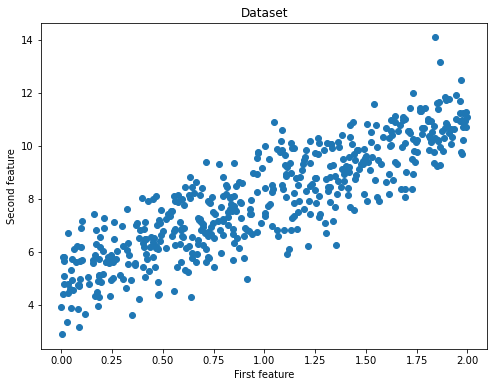

In [2]:
# We will use a simple training set
X = 2 * np.random.rand(500, 1)
y = 5 + 3 * X + np.random.randn(500, 1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [3]:
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (375, 1)
Shape y_train: (375, 1)
Shape X_test: (125, 1)
Shape y_test: (125, 1)


In [4]:
#Linear Regression CLass
class LinearRegression:
    
    def __init__(self):
        pass

    def train_gradient_descent(self, X, y, learning_rate=0.01, n_iters=100):
        """
        Trains a linear regression model using gradient descent
        """
        # Step 0: Initialize the parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(shape=(n_features,1))
        self.bias = 0
        costs = []

        for i in range(n_iters):
            # Step 1: Compute a linear combination of the input features and weights
            y_predict = np.dot(X, self.weights) + self.bias

            # Step 2: Compute cost over training set
            cost = (1 / n_samples) * np.sum((y_predict - y)**2)
            costs.append(cost)

            if i % 100 == 0:
                print(f"Cost at iteration {i}: {cost}")

            # Step 3: Compute the gradients
            dJ_dw = (2 / n_samples) * np.dot(X.T, (y_predict - y))
            dJ_db = (2 / n_samples) * np.sum((y_predict - y)) 
            
            # Step 4: Update the parameters
            self.weights = self.weights - learning_rate * dJ_dw
            self.bias = self.bias - learning_rate * dJ_db

        return self.weights, self.bias, costs

    def train_normal_equation(self, X, y):
        """
        Trains a linear regression model using the normal equation
        """
        self.weights = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        self.bias = 0
        
        return self.weights, self.bias

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

Cost at iteration 0: 66.45256981003433
Cost at iteration 100: 2.2084346146095934
Cost at iteration 200: 1.2797812854182806
Cost at iteration 300: 1.2042189195356685
Cost at iteration 400: 1.1564867816573
Cost at iteration 500: 1.121391041394467


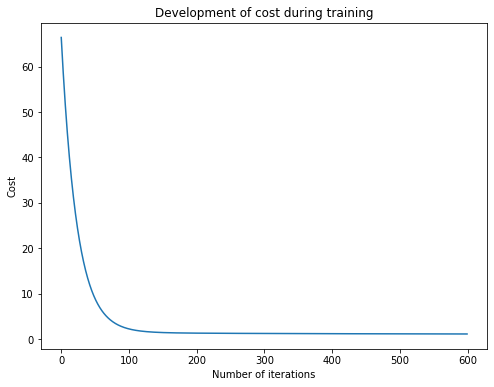

In [5]:
#Training with GD{Gradient Descent}
regressor = LinearRegression()
w_trained, b_trained, costs = regressor.train_gradient_descent(X_train, y_train, learning_rate=0.005, n_iters=600)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(600), costs)
plt.title("Development of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [6]:
#Testing with Gradient Descent model
n_samples, _ = X_train.shape
n_samples_test, _ = X_test.shape

y_p_train = regressor.predict(X_train)
y_p_test = regressor.predict(X_test)

error_train =  (1 / n_samples) * np.sum((y_p_train - y_train) ** 2)
error_test =  (1 / n_samples_test) * np.sum((y_p_test - y_test) ** 2)

print(f"Error on training set: {np.round(error_train, 4)}")
print(f"Error on test set: {np.round(error_test)}")

Error on training set: 1.0955
Error on test set: 1.0


In [7]:
#Training with normal equation
# To compute the parameters using the normal equation, we add a bias value of 1 to each input example
X_b_train = np.c_[np.ones((n_samples)), X_train]
X_b_test = np.c_[np.ones((n_samples_test)), X_test]

reg_normal = LinearRegression()
w_trained = reg_normal.train_normal_equation(X_b_train, y_train)

In [8]:
#Testing with normal equation
y_p_train = reg_normal.predict(X_b_train)
y_p_test = reg_normal.predict(X_b_test)

error_train =  (1 / n_samples) * np.sum((y_p_train - y_train) ** 2)
error_test =  (1 / n_samples_test) * np.sum((y_p_test - y_test) ** 2)

print(f"Error on training set: {np.round(error_train, 4)}")
print(f"Error on test set: {np.round(error_test, 4)}")

Error on training set: 1.0228
Error on test set: 1.0432


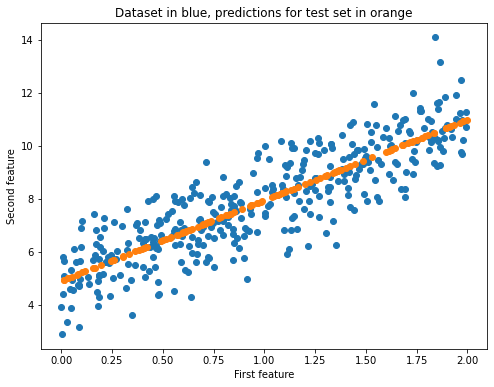

In [9]:
# Plot the test predictions

fig = plt.figure(figsize=(8,6))
plt.title("Dataset in blue, predictions for test set in orange")
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_p_test)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

### LOGISTIC REGRESSION

In logistic regression, we are trying to model the outcome of a **binary variable** given a **linear combination of input features**. For example, we could try to predict the outcome of an election (win/lose) using information about how much money a candidate spent campaigning, how much time she/he spent campaigning, etc.
Logistic regression works as follows.

**Given:** 
- dataset $\{(\boldsymbol{x}^{(1)}, y^{(1)}), ..., (\boldsymbol{x}^{(m)}, y^{(m)})\}$
- with $\boldsymbol{x}^{(i)}$ being a $d-$dimensional vector $\boldsymbol{x}^{(i)} = (x^{(i)}_1, ..., x^{(i)}_d)$
- $y^{(i)}$ being a binary target variable, $y^{(i)} \in \{0,1\}$

The logistic regression model can be interpreted as a very **simple neural network:**
- it has a real-valued weight vector $\boldsymbol{w}= (w^{(1)}, ..., w^{(d)})$
- it has a real-valued bias $b$
- it uses a sigmoid function as its activation function

Different to Linear Regression, logistic regression has no closed form solution. But the cost function is convex, so we can train the model using gradient descent. In fact, **gradient descent** (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is small enough and enough training iterations are used).  

Training a logistic regression model has different steps. In the beginning (step 0) the parameters are initialized. The other steps are repeated for a specified number of training iterations or until convergence of the parameters.

* * * 
**Step 0: ** Initialize the weight vector and bias with zeros (or small random values).
* * *

**Step 1: ** Compute a linear combination of the input features and weights. This can be done in one step for all training examples, using vectorization and broadcasting:
$\boldsymbol{a} = \boldsymbol{X} \cdot \boldsymbol{w} + b $

where $\boldsymbol{X}$ is a matrix of shape $(n_{samples}, n_{features})$ that holds all training examples, and $\cdot$ denotes the dot product.
* * *

**Step 2: ** Apply the sigmoid activation function, which returns values between 0 and 1:

$\boldsymbol{\hat{y}} = \sigma(\boldsymbol{a}) = \frac{1}{1 + \exp(-\boldsymbol{a})}$
* * *

** Step 3: ** Compute the cost over the whole training set. We want to model the probability of the target values being 0 or 1. So during training we want to adapt our parameters such that our model outputs high values for examples with a positive label (true label being 1) and small values for examples with a negative label (true label being 0). This is reflected in the cost function:

$J(\boldsymbol{w},b) = - \frac{1}{m} \sum_{i=1}^m \Big[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \Big]$
* * *

** Step 4: ** Compute the gradient of the cost function with respect to the weight vector and bias. A detailed explanation of this derivation can be found [here](https://stats.stackexchange.com/questions/278771/how-is-the-cost-function-from-logistic-regression-derivated).

The general formula is given by:

$ \frac{\partial J}{\partial w_j} = \frac{1}{m}\sum_{i=1}^m\left[\hat{y}^{(i)}-y^{(i)}\right]\,x_j^{(i)}$

For the bias, the inputs $x_j^{(i)}$ will be given 1.
* * *

** Step 5: ** Update the weights and bias

$\boldsymbol{w} = \boldsymbol{w} - \eta \, \nabla_w J$  

$b = b - \eta \, \nabla_b J$

where $\eta$ is the learning rate.

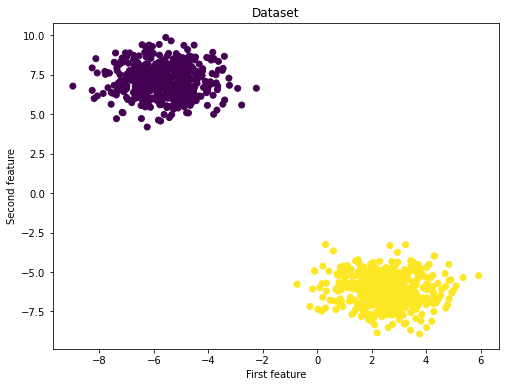

In [10]:
# We will perform logistic regression using a simple toy dataset of two classes
X, y_true = make_blobs(n_samples= 1000, centers=2)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [11]:
# Reshape targets to get column vector with shape (n_samples, 1)
y_true = y_true[:, np.newaxis]
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (750, 2)
Shape y_train: (750, 1)
Shape X_test: (250, 2)
Shape y_test: (250, 1)


In [12]:
class LogisticRegression:
    
    def __init__(self):
        pass

    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))

    def train(self, X, y_true, n_iters, learning_rate):
        """
        Trains the logistic regression model on given data X and targets y
        """
        # Step 0: Initialize the parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = 0
        costs = []
        
        for i in range(n_iters):
            # Step 1 and 2: Compute a linear combination of the input features and weights, 
            # apply the sigmoid activation function
            y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
            
            # Step 3: Compute the cost over the whole training set.
            cost = (- 1 / n_samples) * np.sum(y_true * np.log(y_predict) + (1 - y_true) * (np.log(1 - y_predict)))

            # Step 4: Compute the gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predict - y_true))
            db = (1 / n_samples) * np.sum(y_predict - y_true)

            # Step 5: Update the parameters
            self.weights = self.weights - learning_rate * dw
            self.bias = self.bias - learning_rate * db

            costs.append(cost)
            if i % 100 == 0:
                print(f"Cost after iteration {i}: {cost}")

        return self.weights, self.bias, costs

    def predict(self, X):
        """
        Predicts binary labels for a set of examples X.
        """
        y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_predict_labels = [1 if elem > 0.5 else 0 for elem in y_predict]

        return np.array(y_predict_labels)[:, np.newaxis]

Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.024347490018041984
Cost after iteration 200: 0.012745748220799123
Cost after iteration 300: 0.008729191798321921
Cost after iteration 400: 0.006674666250036772
Cost after iteration 500: 0.005421200912224363


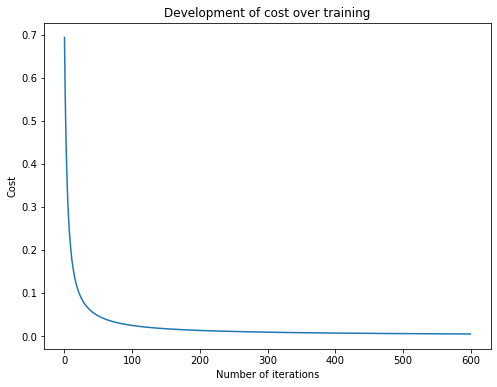

In [13]:
regressor = LogisticRegression()
w_trained, b_trained, costs = regressor.train(X_train, y_train, n_iters=600, learning_rate=0.009)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(600), costs)
plt.title("Development of cost over training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [14]:
y_p_train = regressor.predict(X_train)
y_p_test = regressor.predict(X_test)

print(f"train accuracy: {100 - np.mean(np.abs(y_p_train - y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(y_p_test - y_test))}%")

train accuracy: 100.0%
test accuracy: 100.0%


## Softmax regression in plain Python


Softmax regression, also called multinomial logistic regression extends to multiple classes.

**Given:** 
- dataset $\{(\boldsymbol{x}^{(1)}, y^{(1)}), ..., (\boldsymbol{x}^{(m)}, y^{(m)})\}$
- with $\boldsymbol{x}^{(i)}$ being a $d-$dimensional vector $\boldsymbol{x}^{(i)} = (x^{(i)}_1, ..., x^{(i)}_d)$
- $y^{(i)}$ being the target variable for $\boldsymbol{x}^{(i)}$, for example with $K = 3$ classes we might have $y^{(i)} \in \{0, 1, 2\}$

A softmax regression model has the following features: 
- a separate real-valued weight vector $\boldsymbol{w}= (w^{(1)}, ..., w^{(d)})$ for each class. The weight vectors are typically stored as rows in a weight matrix.
- a separate real-valued bias $b$ for each class
- the softmax function as an activation function
- the cross-entropy loss function

The training procedure of a softmax regression model has different steps. In the beginning (step 0) the model parameters are initialized. The other steps (see below) are repeated for a specified number of training iterations or until the parameters have converged.

* * * 
**Step 0: ** Initialize the weight matrix and bias values with zeros (or small random values).
* * *

**Step 1: ** For each class $k$ compute a linear combination of the input features and the weight vector of class $k$, that is, for each training example compute a score for each class. For class $k$ and input vector $\boldsymbol{x}^{(i)}$ we have:

$score_{k}(\boldsymbol{x}^{(i)}) = \boldsymbol{w}_{k}^T \cdot \boldsymbol{x}^{(i)} + b_{k}$

where $\cdot$ is the dot product and $\boldsymbol{w}_{(k)}$ the weight vector of class $k$.
We can compute the scores for all classes and training examples in parallel, using vectorization and broadcasting:

$\boldsymbol{scores} = \boldsymbol{X} \cdot \boldsymbol{W}^T + \boldsymbol{b} $

where $\boldsymbol{X}$ is a matrix of shape $(n_{samples}, n_{features})$ that holds all training examples, and $\boldsymbol{W}$ is a matrix of shape $(n_{classes}, n_{features})$ that holds the weight vector for each class. 
* * *

**Step 2: ** Apply the softmax activation function to transform the scores into probabilities. The probability that an input vector $\boldsymbol{x}^{(i)}$ belongs to class $k$ is given by

$\hat{p}_k(\boldsymbol{x}^{(i)}) = \frac{\exp(score_{k}(\boldsymbol{x}^{(i)}))}{\sum_{j=1}^{K} \exp(score_{j}(\boldsymbol{x}^{(i)}))}$

Again we can perform this step for all classes and training examples at once using vectorization. The class predicted by the model for $\boldsymbol{x}^{(i)}$ is then simply the class with the highest probability.
* * *

** Step 3: ** Compute the cost over the whole training set. We want our model to predict a high probability for the target class and a low probability for the other classes. This can be achieved using the cross entropy loss function: 

$J(\boldsymbol{W},b) = - \frac{1}{m} \sum_{i=1}^m \sum_{k=1}^{K} \Big[ y_k^{(i)} \log(\hat{p}_k^{(i)})\Big]$

In this formula, the target labels are *one-hot encoded*. So $y_k^{(i)}$ is $1$ is the target class for $\boldsymbol{x}^{(i)}$ is k, otherwise $y_k^{(i)}$ is $0$.

Note: when there are only two classes, this cost function is equivalent to the cost function of [logistic regression](logistic_regression.ipynb).
* * *

** Step 4: ** Compute the gradient of the cost function with respect to each weight vector and bias. A detailed explanation of this derivation can be found [here](http://ufldl.stanford.edu/tutorial/supervised/SoftmaxRegression/).

The general formula for class $k$ is given by:

$ \nabla_{\boldsymbol{w}_k} J(\boldsymbol{W}, b) = \frac{1}{m}\sum_{i=1}^m\boldsymbol{x}^{(i)} \left[\hat{p}_k^{(i)}-y_k^{(i)}\right]$

For the biases, the inputs $\boldsymbol{x}^{(i)}$ will be given 1.
* * *

** Step 5: ** Update the weights and biases for each class $k$:

$\boldsymbol{w}_k = \boldsymbol{w}_k - \eta \, \nabla_{\boldsymbol{w}_k} J$  

$b_k = b_k - \eta \, \nabla_{b_k} J$

where $\eta$ is the learning rate.

In [15]:
np.random.seed(13)

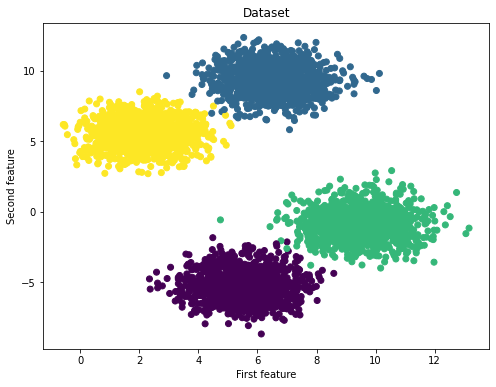

In [16]:
X, y_true = make_blobs(centers=4, n_samples = 5000)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [17]:
# reshape targets to get column vector with shape (n_samples, 1)
y_true = y_true[:, np.newaxis]
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape X_train: (3750, 2)
Shape y_train: (3750, 1)
Shape X_test: (1250, 2)
Shape y_test: (1250, 1)


In [18]:
class SoftmaxRegressor:

    def __init__(self):
        pass

    def train(self, X, y_true, n_classes, n_iters=10, learning_rate=0.1):
        """
        Trains a multinomial logistic regression model on given set of training data
        """
        self.n_samples, n_features = X.shape
        self.n_classes = n_classes
        
        self.weights = np.random.rand(self.n_classes, n_features)
        self.bias = np.zeros((1, self.n_classes))
        all_losses = []
        
        for i in range(n_iters):
            scores = self.compute_scores(X)
            probs = self.softmax(scores)
            y_predict = np.argmax(probs, axis=1)[:, np.newaxis]
            y_one_hot = self.one_hot(y_true)

            loss = self.cross_entropy(y_one_hot, probs)
            all_losses.append(loss)

            dw = (1 / self.n_samples) * np.dot(X.T, (probs - y_one_hot))
            db = (1 / self.n_samples) * np.sum(probs - y_one_hot, axis=0)

            self.weights = self.weights - learning_rate * dw.T
            self.bias = self.bias - learning_rate * db

            if i % 100 == 0:
                print(f'Iteration number: {i}, loss: {np.round(loss, 4)}')

        return self.weights, self.bias, all_losses

    def predict(self, X):
        """
        Predict class labels for samples in X.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            numpy array of shape (n_samples, 1) with predicted classes
        """
        scores = self.compute_scores(X)
        probs = self.softmax(scores)
        return np.argmax(probs, axis=1)[:, np.newaxis]

    def softmax(self, scores):
        """
        Tranforms matrix of predicted scores to matrix of probabilities
        
        Args:
            scores: numpy array of shape (n_samples, n_classes)
            with unnormalized scores
        Returns:
            softmax: numpy array of shape (n_samples, n_classes)
            with probabilities
        """
        exp = np.exp(scores)
        sum_exp = np.sum(np.exp(scores), axis=1, keepdims=True)
        softmax = exp / sum_exp
        
        return softmax

    def compute_scores(self, X):
        """
        Computes class-scores for samples in X
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            scores: numpy array of shape (n_samples, n_classes)
        """
        return np.dot(X, self.weights.T) + self.bias

    def cross_entropy(self, y_true, probs):
        loss = - (1 / self.n_samples) * np.sum(y_true * np.log(probs))
        return loss

    def one_hot(self, y):
        """
        Tranforms vector y of labels to one-hot encoded matrix
        """
        one_hot = np.zeros((self.n_samples, self.n_classes))
        one_hot[np.arange(self.n_samples), y.T] = 1
        return one_hot

Iteration number: 0, loss: 3.1901
Iteration number: 100, loss: 0.2031
Iteration number: 200, loss: 0.1589
Iteration number: 300, loss: 0.1358
Iteration number: 400, loss: 0.1199
Iteration number: 500, loss: 0.1079
Iteration number: 600, loss: 0.0982
Iteration number: 700, loss: 0.0902


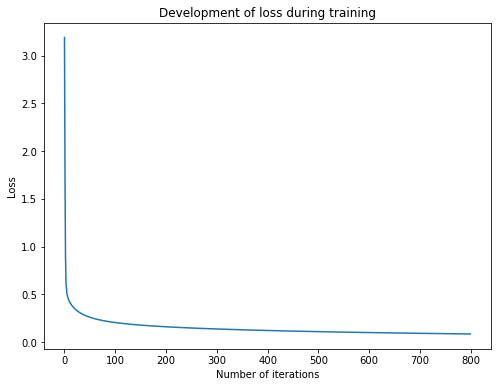

In [19]:
regressor = SoftmaxRegressor()
w_trained, b_trained, loss = regressor.train(X_train, y_train, learning_rate=0.1, n_iters=800, n_classes=4)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(800), loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

In [20]:
n_test_samples, _ = X_test.shape
y_predict = regressor.predict(X_test)
print(f"Classification accuracy on test set: {(np.sum(y_predict == y_test)/n_test_samples) * 100}%")

Classification accuracy on test set: 99.03999999999999%
